# Edge Detection Using Laplacian

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve

In [38]:
dir_path = "C:/Users/gerag/Desktop/Coursera/Fisrt Principles of Computer Vision/Features and Boundaries/Edge Detection Using Laplacian/"
im_name = "rubiks.png"

In [39]:
def plot_img(img, title):
    plt.title(title)
    plt.imshow(img,cmap='gray')
    plt.grid(False)
    plt.axis('off')
    plt.rcParams["figure.autolayout"] = True
    plt.show()

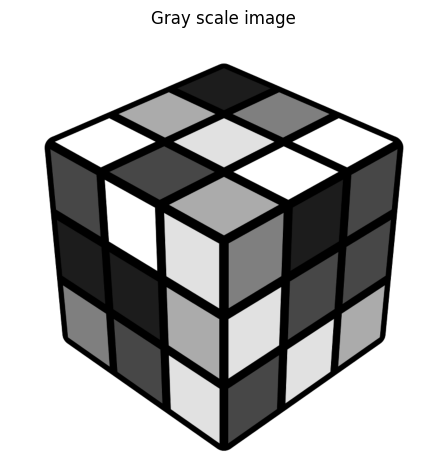

In [40]:
img_color = cv2.imread(dir_path+im_name) #Read image in grey scale
img_color = cv2.resize(img_color, (800,800), interpolation = cv2.INTER_CUBIC)
img = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
plot_img(img, "Gray scale image")

### Laplacian $\nabla^2$ as Edge Detector

##### Discrete Laplacian Operator
<img src="eq_1.png" 
        alt="Picture" 
        style="display: block; margin: 0 auto" />

$$\frac{\partial^2 I}{\partial x^2} \approx \frac{1}{\epsilon^2} \left( I_{i-1,j} - 2I_{i,j}+I_{i+1,j}\right)$$

$$\frac{\partial^2 I}{\partial y^2} \approx \frac{1}{\epsilon^2} \left( I_{i,j-1} - 2I_{i,j}+I_{i,j+1}\right)$$

##### Convolution masks

$$\nabla^2 \approx \frac{1}{\epsilon^2} \begin{bmatrix} 0 & 1 & 0\\ 1 & -4 & 1 \\0 & 1 & 0  \end{bmatrix} \hspace{1.5cm} OR \hspace{1.5cm} \nabla^2 \approx \frac{1}{\epsilon^2} \begin{bmatrix} 1 & 4 & 1\\ 4 & -20 & 4 \\1 & 4 & 1  \end{bmatrix}  $$


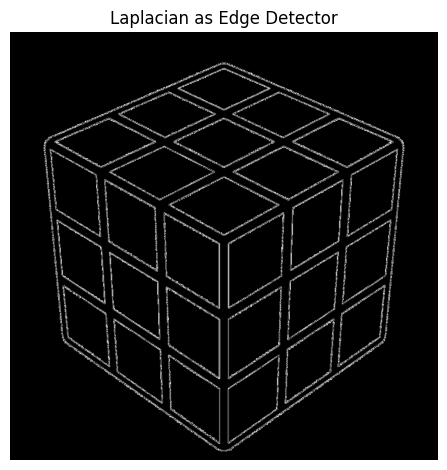

In [41]:
epsilon = 1
mask = 1/epsilon**2 * np.array([[1,4,1],[4,-20,4],[1,4,1]],"uint8")

laplacian_img = convolve(img,mask)

plot_img(laplacian_img, "Laplacian as Edge Detector")

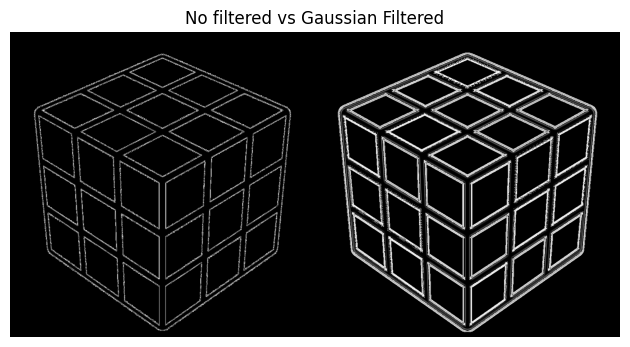

In [43]:
#Now with gaussian filter
filtered = cv2.GaussianBlur(img,(7,7),cv2.BORDER_DEFAULT)
laplacian_filtered_img = convolve(filtered,mask)
plot_img(np.concatenate((laplacian_img,laplacian_filtered_img),axis = 1),"No filtered vs Gaussian Filtered")